<a href="https://colab.research.google.com/github/AnishaBeck/ML/blob/main/UCL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About the Champions league and the datasets:**
****
The UEFA Champions League is an annual club football competition organised by the Union of European Football Associations and contested by top-division European clubs, deciding the competition winners through a round robin group stage to qualify for a double-legged knockout format, and a single leg final.

This dataset contains all the player stats of UEFA Champions League season 2021-22 .

**Import libararies:**


In [ ]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3

**Load Data**

In [ ]:
ks=pd.read_csv("/content/key_stats.csv")
gl=pd.read_csv("/content/goals.csv")
dfn=pd.read_csv("/content/defending.csv")
atkg=pd.read_csv("/content/attacking.csv")
gk=pd.read_csv("/content/goalkeeping.csv")
dsp=pd.read_csv("/content/disciplinary.csv")
atm=pd.read_csv("/content/attempts.csv")
dis=pd.read_csv("/content/distributon.csv")

**KEY STATS ANALYSIS**

In [ ]:
ks.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [ ]:
ks.columns

Index(['player_name', 'club', 'position', 'minutes_played', 'match_played',
       'goals', 'assists', 'distance_covered'],
      dtype='object')

We have player name, their club, playing position, minutes - matches played, goals, assists and the distance covered. Lets look at the stats.


In [ ]:
ks.describe().T

,count,mean,std,min,25%,50%,75%,max
minutes_played,747.0,331.611780,248.371930,1.0,116.0,301.0,492.0,1230.0
match_played,747.0,5.089692,2.721425,1.0,3.0,5.0,7.0,13.0
goals,747.0,0.492637,1.313321,0.0,0.0,0.0,0.0,15.0
assists,747.0,0.376171,0.845502,0.0,0.0,0.0,0.0,7.0


We have data of 747 players in total. Average laying time is 331 mins, about 5.5 hours.

In [ ]:
ks.describe(include=['object']).T

,count,unique,top,freq
player_name,747,731,Martínez,3
club,747,32,Man. United,31
position,747,4,Midfielder,287
distance_covered,747,514,3.6,5


Here we observe that most of the players are midfielders and Manchester United has maximum number of player that's 31.

**Goal Analysis by club**

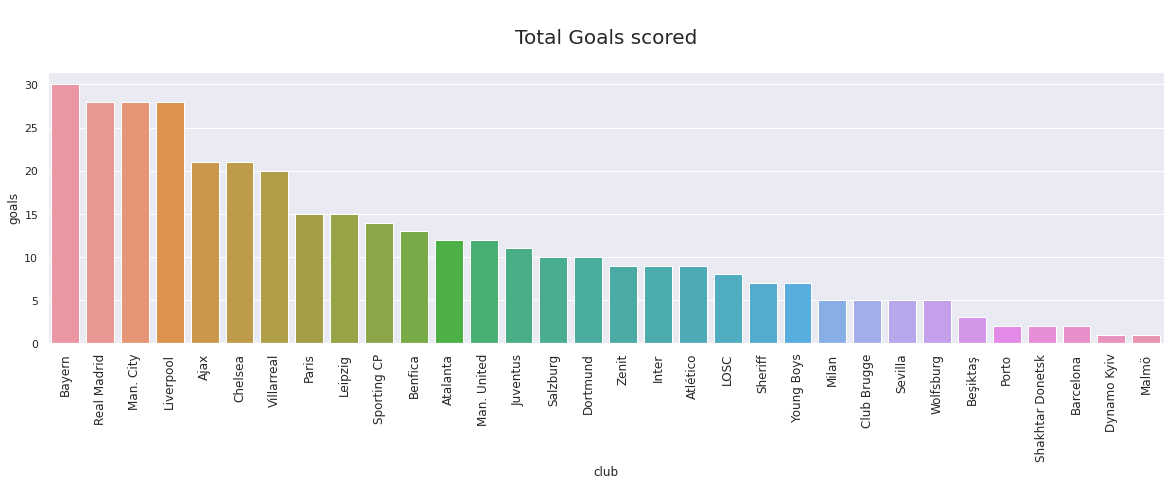

In [ ]:
tks=ks.groupby('club',as_index = False)["goals"].sum().sort_values(by='goals',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="club", y="goals", data=tks,capsize=.2)
p.axes.set_title("\nTotal Goals scored\n",fontsize=20);

Top 3 goal scorer are:


*   Bayern
*   Real Madrid
*   Manchester city


**Dist Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


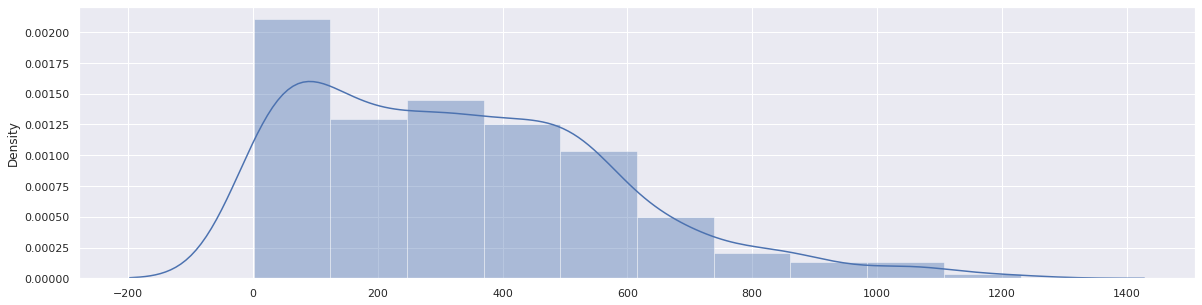

In [ ]:
import seaborn as sns
sns.distplot(x = ks['minutes_played'], bins = 10)

Most of the players have played in the range of 0 to 100 minutes.

**Joint plot**

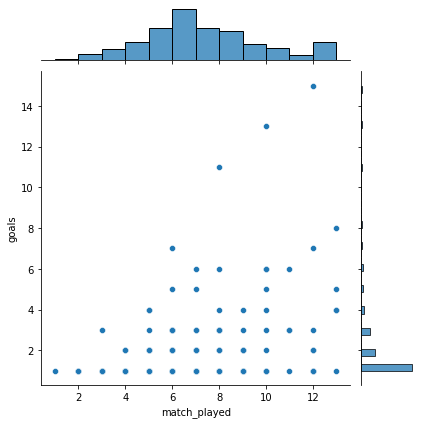

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

ks = pd.read_csv("/content/goals.csv")
# For Plot
sns.jointplot(x = ks['match_played'], y = ks['goals'], kind = 'scatter')

Match played is positively related to goals scored.

**Pair Plot**

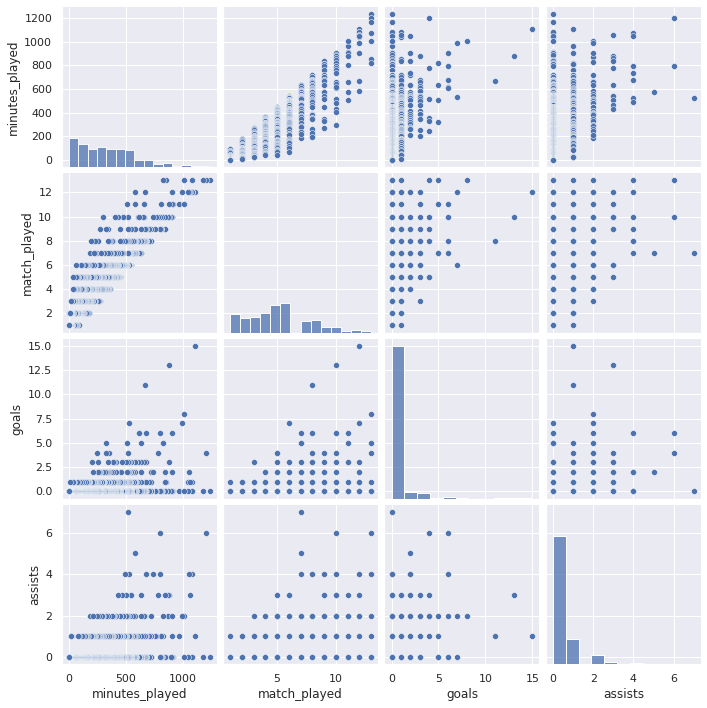

In [ ]:
sns.pairplot(ks)

**Correlation:**

In [ ]:
ks.corr()

,minutes_played,match_played,goals,assists
minutes_played,1.000000,0.886601,0.338638,0.377284
match_played,0.886601,1.000000,0.371301,0.401274
goals,0.338638,0.371301,1.000000,0.355601
assists,0.377284,0.401274,0.355601,1.000000


**Heatmap**

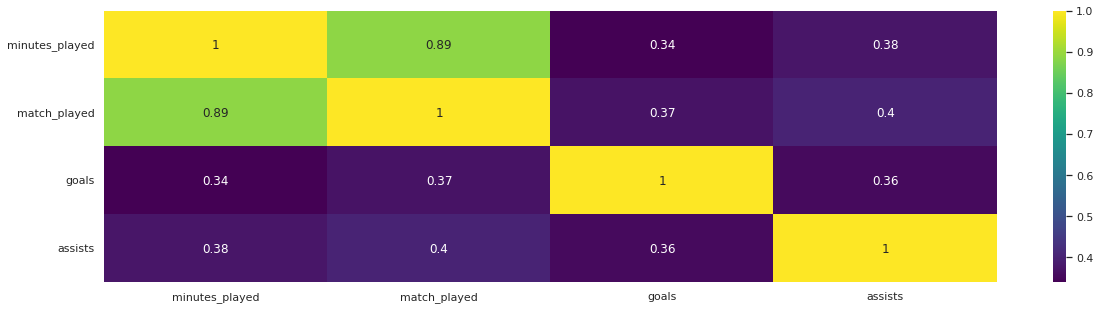

In [ ]:
sns.heatmap(ks.corr(), annot = True, cmap = 'viridis')

**BarPlot**

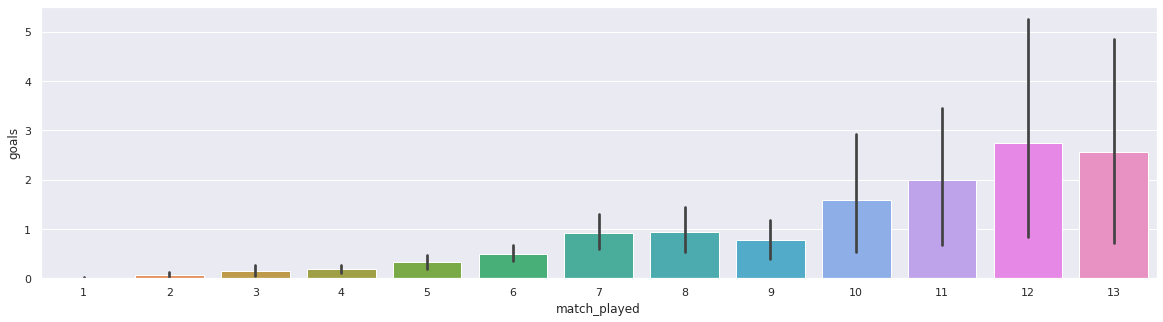

In [ ]:
sns.barplot(x = ks['match_played'], y = ks['goals'])

**Boxplot**

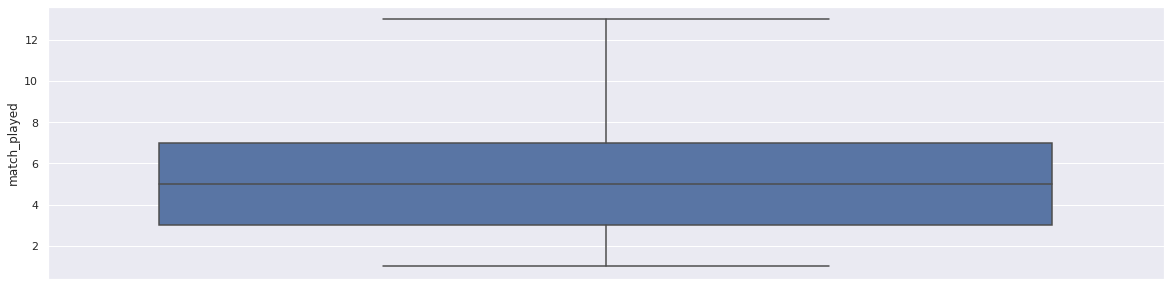

In [ ]:
sns.boxplot(y=ks["match_played"])

**Violin Plot**

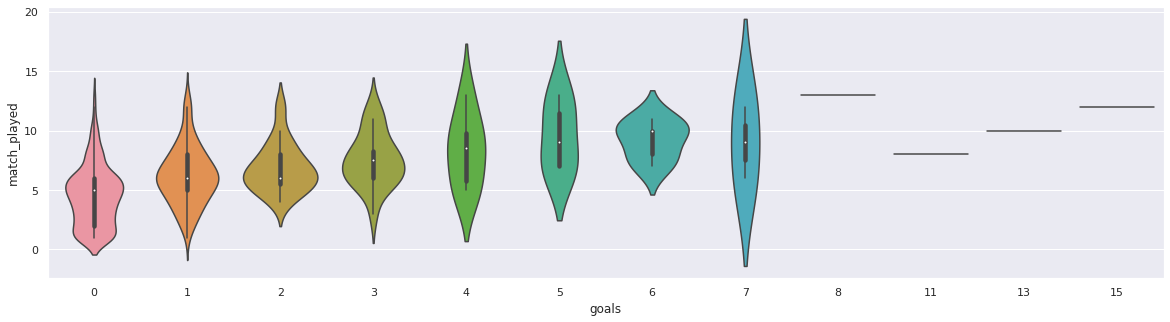

In [ ]:
sns.violinplot(y=ks['match_played'], x=ks['goals'])

Violin plots have many of the same summary statistics as box plots:

the white dot represents the median
the thick gray bar in the center represents the interquartile range
the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.

**Strip Plot**

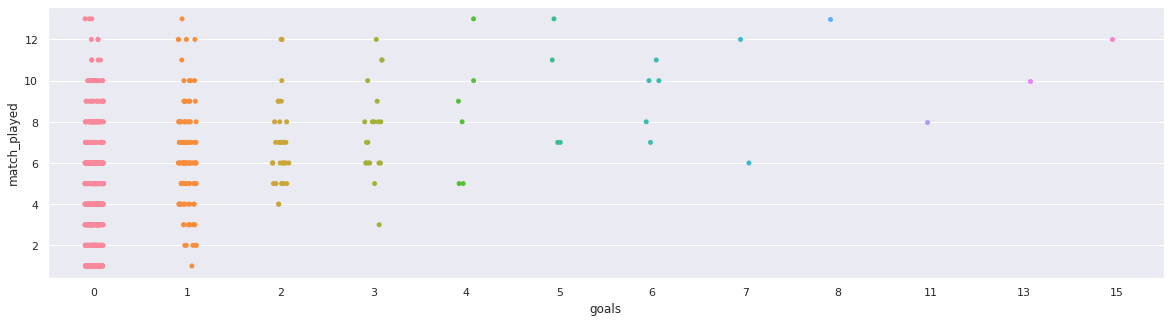

In [ ]:
sns.stripplot(y = ks['match_played'], x=ks['goals'])

In [ ]:
ks.isna().sum()

player_name         0
club                0
position            0
minutes_played      0
match_played        0
goals               0
assists             0
distance_covered    0
dtype: int64

In [ ]:
gk.isna().sum()

serial             0
player_name        0
club               0
position           0
saved              0
conceded           0
saved_penalties    0
cleansheets        0
punches made       0
match_played       0
dtype: int64

In [ ]:
gl.isna().sum()

serial           0
player_name      0
club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64

In [ ]:
atm.isna().sum()

serial            0
player_name       0
club              0
position          0
total_attempts    0
on_target         0
off_target        0
blocked           0
match_played      0
dtype: int64

In [ ]:
dis.isna().sum()

serial             0
player_name        0
club               0
position           0
pass_accuracy      0
pass_attempted     0
pass_completed     0
cross_accuracy     0
cross_attempted    0
cross_complted     0
freekicks_taken    0
match_played       0
dtype: int64

In [ ]:
dsp.isna().sum()

serial             0
player_name        0
club               0
position           0
fouls_committed    0
fouls_suffered     0
red                0
yellow             0
minutes_played     0
match_played       0
dtype: int64

In [ ]:
atkg.isna().sum()

serial          0
player_name     0
club            0
position        0
assists         0
corner_taken    0
offsides        0
dribbles        0
match_played    0
dtype: int64

In [ ]:
dfn.isna().sum()

serial                 0
player_name            0
club                   0
position               0
balls_recoverd         0
tackles                0
t_won                  0
t_lost                 0
clearance_attempted    0
match_played           0
dtype: int64

**SimpleImputer**

No need to use SimpleImputer as therre are no null values in my datasets.

In [ ]:
# from sklearn.impute import SimpleImputer
# df = pd.read_csv('NaNDataset.csv')
# imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
# imputer = imputer.fit(df[['B']])
# df['B'] = imputer.transform(df[['B']])
# df

### Goalkeepers Statistics:

In [ ]:
gk.head()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6


In [ ]:
gk.groupby(["club"])["conceded"].sum().astype("int32").reset_index().sort_values(["conceded"],ascending=False).reset_index(drop=True).style.background_gradient("Reds")

,club,conceded
0,Club Brugge,20
1,Beşiktaş,19
2,Benfica,17
3,Sporting CP,17
4,Villarreal,16
5,Man. City,16
6,Malmö,14
7,Leipzig,14
8,Real Madrid,14
9,Liverpool,14


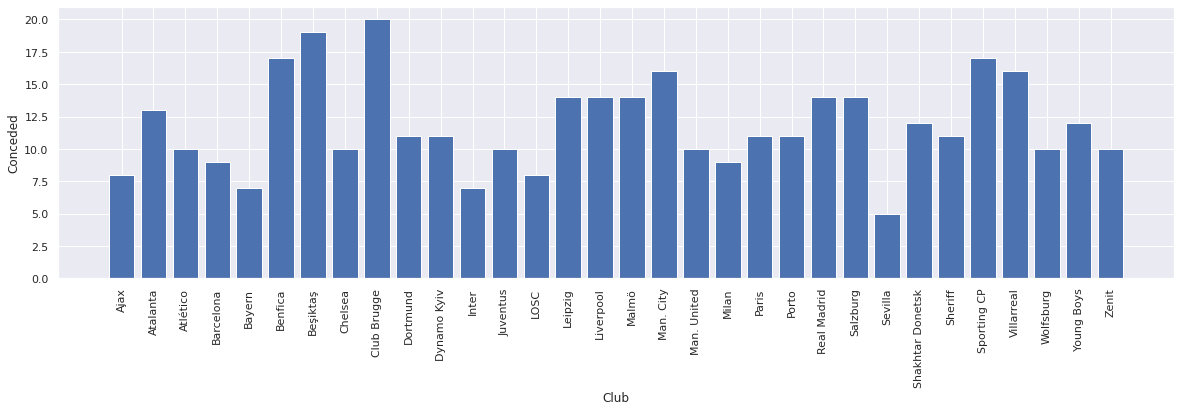

In [ ]:
results = gk.groupby('club').sum()
data = gk.groupby(["club"])["conceded"].sum()
clubs = [club for club, df in data.groupby('club')]
plt.bar(x=clubs, height= results['conceded'])
plt.xlabel('Club')
plt.ylabel('Conceded')
plt.xticks(clubs,rotation = 'vertical')
plt.show()

**Observation:**
Club Brugge has conceded the most goals in this season.

**Distribution plot for goals**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


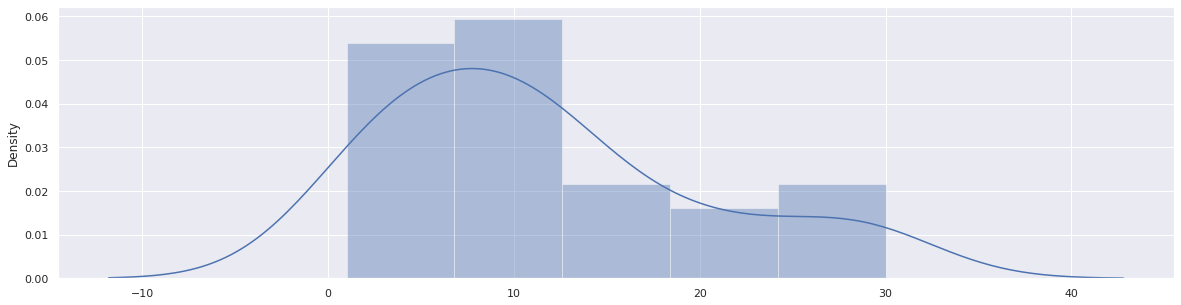

In [ ]:
import seaborn as sns

sns.distplot(x = ks.groupby(['club'])['goals'].sum())


**Scatter plot for assists and goals with different positions**

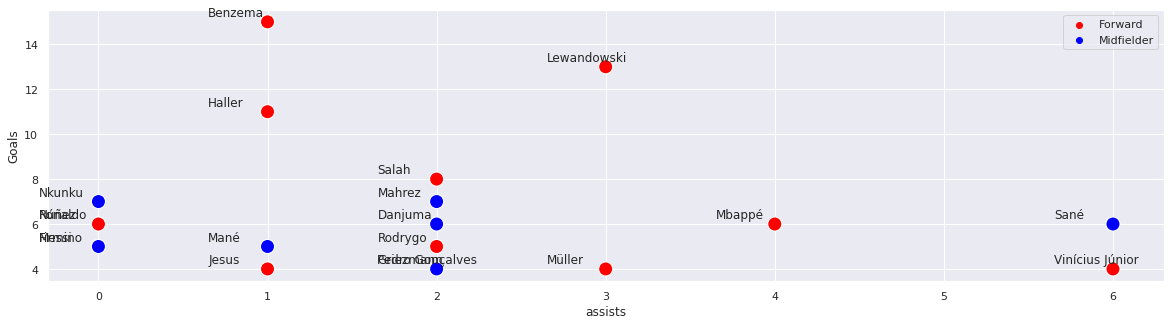

In [ ]:
data = ks[["player_name","club","position","assists","goals"]].sort_values(["goals"],ascending=False).reset_index(drop=True).head(20)
sns.scatterplot(data = data,
               x = 'assists',
               y = 'goals',
               hue="position",s=200, palette=["red","blue"])
for i in range(len(data)):
    if data["player_name"][i] == 'Foden':
        plt.text(x=data["assists"][i]-0.35, y = data["goals"][i]-0.40, s = data["player_name"][i])
    else:
        plt.text(x=data["assists"][i]-0.35, y = data["goals"][i]+0.25, s = data["player_name"][i])
plt.legend()
plt.xlabel("assists")
plt.ylabel("Goals")
plt.show()

**Player wise goals**

In [ ]:
gl[["player_name","goals"]].sort_values("goals",ascending=False).reset_index(drop=True).head(20).style.background_gradient("Greens")

,player_name,goals
0,Benzema,15
1,Lewandowski,13
2,Haller,11
3,Salah,8
4,Nkunku,7
5,Mahrez,7
6,Ronaldo,6
7,Sané,6
8,Danjuma,6
9,Núñez,6


**BARH**

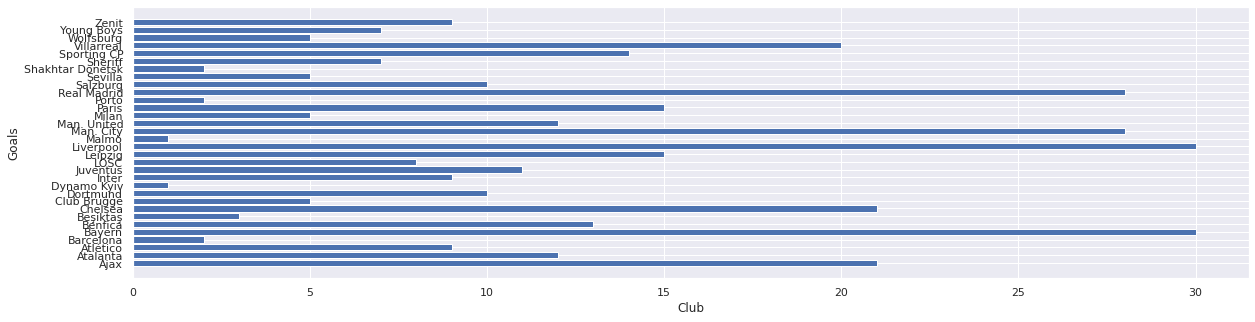

In [ ]:
result = gl.groupby('club').sum()
data = gl[["player_name","club","goals"]].sort_values("goals",ascending=False)
clubs = [club for club, df in data.groupby('club')]
plt.barh(y=clubs, width= result['goals'])
plt.xlabel('Club')
plt.ylabel('Goals')
plt.yticks(clubs)
plt.show()

**Position wise assist**

In [ ]:
ks.groupby(["position"])["assists"].sum().reset_index().sort_values("assists",ascending=False).style.background_gradient("Greens")

,position,assists
3,Midfielder,130
1,Forward,81
0,Defender,69
2,Goalkeeper,1


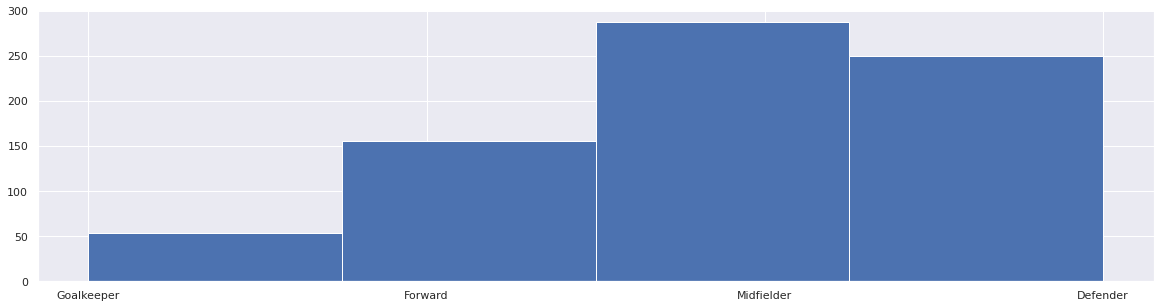

In [ ]:
data1 = ks.groupby(["position"])["assists"].sum()
plt.hist(x=ks['position'],bins=4)
plt.show()

**PIE**

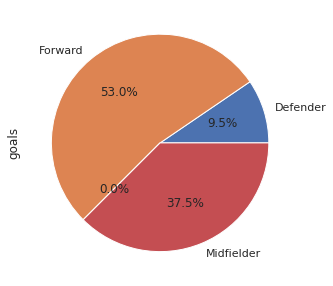

In [ ]:
data2 = ks.groupby("position")["goals"].sum()
data2
data2.plot.pie(autopct ="%.1f%%")

Observations:

As RMA is finalist and played 2 extra times, average laying time per player should be higher; but it is substantially higher than another finalistt Liverpool (4th). So, the reason can be - RMA used less players in UCL, so each player player had to player longer than usual.

Suggestions:

Playing time pressure should be reduced, and more player should be given place to perform.

In [ ]:
ks[["player_name","minutes_played","match_played"]].sort_values("minutes_played",ascending=False).reset_index(drop=True).head(20).style.background_gradient("Greens")

,player_name,minutes_played,match_played
0,Courtois,1230,13
1,Vinícius Júnior,1199,13
2,Alisson Becker,1170,13
3,Benzema,1106,12
4,Pau Torres,1080,12
5,Rulli,1080,12
6,Modrić,1077,13
7,Éder Militão,1076,12
8,Parejo,1055,12
9,Capoue,1046,12


**ATTACKING!**

In [ ]:
dis[["player_name","pass_accuracy","pass_attempted"]].sort_values(["pass_attempted"],ascending=False).reset_index(drop=True).head(20).style.background_gradient("Greens")

,player_name,pass_accuracy,pass_attempted
0,Kroos,91.900000,814
1,Rodri,94.200000,806
2,Modrić,89.800000,799
3,Rüdiger,90.300000,750
4,Laporte,94.700000,707
5,Kimmich,89.500000,688
6,Alexander-Arnold,80.000000,685
7,Pavard,90.200000,676
8,Martínez,94.100000,674
9,João Cancelo,88.000000,668


**ATTEMPTS!**

In [ ]:
atm['on_target_rate'] = (atm['on_target']) / (atm.total_attempts)
atm[["player_name","total_attempts","on_target_rate"]].sort_values(["total_attempts"],ascending=False).reset_index(drop=True).head(20).style.background_gradient("Greens")

,player_name,total_attempts,on_target_rate
0,Benzema,45,0.511111
1,Salah,42,0.523810
2,Mahrez,37,0.486486
3,Sané,33,0.393939
4,Lewandowski,31,0.612903
5,Luis Díaz,29,0.379310
6,Martínez,28,0.250000
7,Mbappé,27,0.592593
8,Vinícius Júnior,27,0.296296
9,Havertz,26,0.423077


In [ ]:
ks.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
ks.describe().T

,count,mean,std,min,25%,50%,75%,max
minutes_played,747.0,331.611780,248.371930,1.0,116.0,301.0,492.0,1230.0
match_played,747.0,5.089692,2.721425,1.0,3.0,5.0,7.0,13.0
goals,747.0,0.492637,1.313321,0.0,0.0,0.0,0.0,15.0
assists,747.0,0.376171,0.845502,0.0,0.0,0.0,0.0,7.0


In [ ]:
ks.info

<bound method DataFrame.info of          player_name         club    position  minutes_played  match_played  \
0           Courtois  Real Madrid  Goalkeeper            1230            13   
1    Vinícius Júnior  Real Madrid     Forward            1199            13   
2            Benzema  Real Madrid     Forward            1106            12   
3             Modrić  Real Madrid  Midfielder            1077            13   
4       Éder Militão  Real Madrid    Defender            1076            12   
..               ...          ...         ...             ...           ...   
742         Gil Dias      Benfica  Midfielder               1             1   
743  Rodrigo Ribeiro  Sporting CP     Forward               1             1   
744         Cojocari      Sheriff    Defender               1             1   
745         Maouassa  Club Brugge    Defender               1             1   
746          Zesiger   Young Boys    Defender               1             1   

     goals  assists

In [ ]:
y = ks['goals']
X = ks.drop(['player_name','club','assists','distance_covered'], axis=1)
X = X.drop('position', axis =1)
X = X.drop('goals', axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [ ]:
X.head(20)

,minutes_played,match_played
0,1230,13
1,1199,13
2,1106,12
3,1077,13
4,1076,12
5,1040,12
6,959,11
7,914,11
8,902,12
9,867,10


In [ ]:
K=[]
training = []
test = []
score = {}

for k in range(2,5):
  clf = KNeighborsClassifier(n_neighbors= k)
  clf.fit(X_train, y_train)

  training_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  K.append(k)

  training.append(training_score)
  test.append(test_score)
  score[k] = [training_score, test_score]

In [ ]:
for keys, values in score.items():
    print(keys, ':', values)

2 : [0.8084291187739464, 0.7422222222222222]
3 : [0.789272030651341, 0.7288888888888889]
4 : [0.7835249042145593, 0.7377777777777778]


Minute played and number of matches played is strongly related to score a goal as the values are greater than 0.5, closer to 1.

---




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


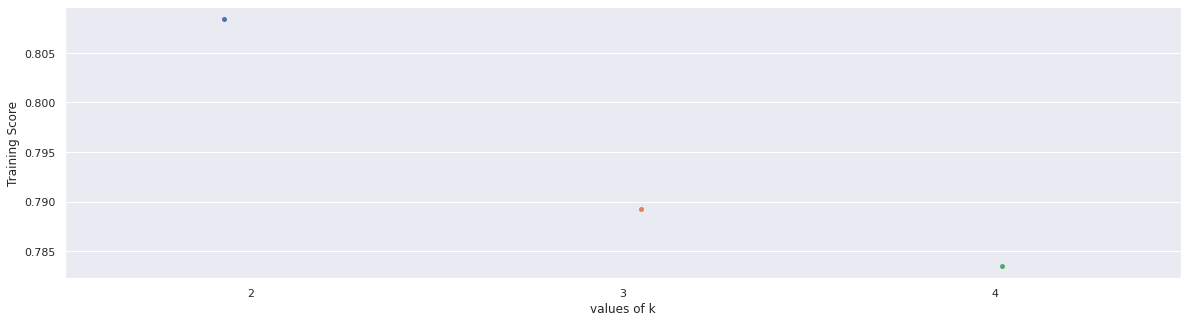

In [ ]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

Our KNN prediction has more than 0.74 score.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


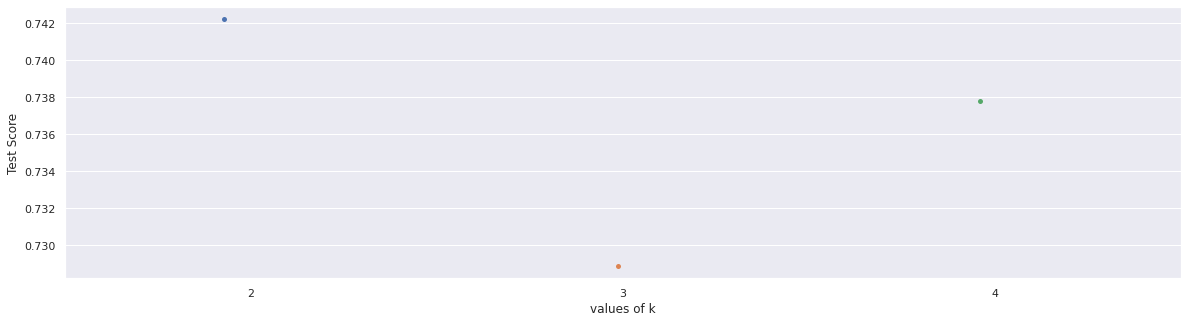

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

Our KNN test gives us more than 0.78 score.



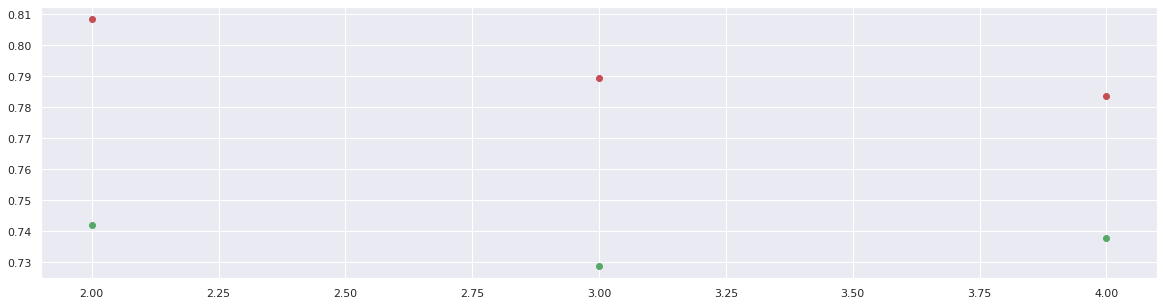

In [ ]:
plt.scatter(K, training, color ='r')
plt.scatter(K, test, color ='g')
plt.show()
# For overlapping scatter plots

# Lab 2: 
Implement the data preprocessing techniques on the same selected data of your choosen
domain and provide a detailed inference related to each and every preprocessing task like
1. Identifying unique values
2. Finding Missing values
3. Replacing missing values and null values
4. Normalizing the data using standard scaler or minmax scaler
5. Apply KNN for the preprocessed dataset use 5 different K Values and 3 different
distance measures
6. Display the confusion matrix, accuracy measures, classification report.
7. Provide appropriate inference for every task performed.

 *We will focus on Goals dataset.*

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gl = pd.read_csv("/content/goals.csv")

In [ ]:
gl.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [ ]:
gl.info

<bound method DataFrame.info of      serial     player_name         club    position  goals  right_foot  \
0         1         Benzema  Real Madrid     Forward     15          11   
1         2     Lewandowski       Bayern     Forward     13           8   
2         3          Haller         Ajax     Forward     11           3   
3         4           Salah    Liverpool     Forward      8           0   
4         5          Nkunku      Leipzig  Midfielder      7           3   
..      ...             ...          ...         ...    ...         ...   
178      73         Yansané      Sheriff     Forward      1           0   
179      73     Yakhshiboev      Sheriff     Forward      1           0   
180      73  Messias Junior        Milan     Forward      1           0   
181      73          Morato      Benfica    Defender      1           0   
182      73     Pedro Porro  Sporting CP    Defender      1           0   

     left_foot  headers  others  inside_area  outside_areas  penalt

In [ ]:
gl.describe()

,serial,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,55.016393,2.021858,0.972678,0.693989,0.327869,0.021858,1.814208,0.207650,0.196721,6.841530
std,24.173929,2.005367,1.400281,1.140810,0.612722,0.146621,1.923943,0.514137,0.549315,2.568196
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,43.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000
50%,73.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000
75%,73.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,8.000000
max,73.000000,15.000000,11.000000,8.000000,3.000000,1.000000,13.000000,3.000000,3.000000,13.000000


In [ ]:
gl.isna().sum()

serial           0
player_name      0
club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64

In [ ]:
gl.nunique()

serial            11
player_name      183
club              32
position           3
goals             11
right_foot         9
left_foot          7
headers            4
others             2
inside_area       10
outside_areas      4
penalties          4
match_played      13
dtype: int64

**Observation:**
We have 183 unique players from 32 different clubs.
There are 3 unique positions that have scored atleast one goal. 

Most of the goals are scored from the inside area.

There are no missing and null values in my dataset.

###### **Data Normalization using MinMaxScaler.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd
import numpy as np

data = gl.drop(['serial','player_name','club','position'], axis = 1)
scaler = MinMaxScaler(feature_range = (0,1))
normalizedData = scaler.fit_transform(data.values.reshape(-1,1))
encoder = OneHotEncoder(categories='auto',sparse=False)
encodedData = encoder.fit_transform(normalizedData.reshape(-1,1))
print(encodedData)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
min = scaler.data_min_
print(min)

[0.]


In [ ]:
max = scaler.data_max_
print(max)

[15.]


##### Apply KNN for the preprocessed dataset use 5 different K Values and 3 different distance measures



1.   K = 5 and distance measures, p=2. 


In [ ]:
# Importing the dataset
dataset = gl
X = dataset.iloc[:, [9, 10]].values
y = dataset['goals'].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print("\n")
print(ac)


[[22  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  1  2  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  2  0  0]]


0.8648648648648649




2.   K = **6** and distance measures, p=2. 



In [ ]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print("\n",ac)

[[22  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  2  0  0]]

 0.8648648648648649


3. K = 7 and distance measures, p=3. 

In [ ]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print("\n",ac)

[[22  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  2  0  0]]

 0.8648648648648649




4.   K = 8 and distance measures, p=3.



In [ ]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)

[[22  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  2  0  0]]
0.8648648648648649


5.   K = 11 and distance measures, p=4.



In [ ]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print("\n",ac)

[[22  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 1  0  2  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  2  0  0]]

 0.8378378378378378


In [ ]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 30, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print("\n",ac)

[[22  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 1  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 1  0  1  0  0  0]
 [ 0  0  2  0  0  0]]

 0.7837837837837838


**Observation:**
Our KNN model has 0.86 accuracy which shows it is performing well.

**Classification report:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
#define the predictor variables and the response variable
X = dataset[['inside_area', 'outside_areas']]
y = dataset['goals']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)  

#instantiate the model
logistic_regression = LogisticRegression()

#fit the model using the training data
logistic_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#print classification report for model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        32
           2       0.91      0.91      0.91        11
           3       0.57      0.80      0.67         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.84        55
   macro avg       0.35      0.39      0.37        55
weighted avg       0.80      0.84      0.82        55



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Precision: Out of all the players that the model predicted would score a goal, 97% actually did.
2 goals 91% did.
3 goals only 57% scored.

Recall: Out of all the players that actually did score a goal, the model predicted this outcome correctly for 100% of those players.
2 goals prediction 91%.
3 goals prediction 80%.

F1 Score: This value is calculated as:

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

F1 Score: 2 * (.97 * .10) / (.96 + 1.0)

F1 Score: 0.98.

Since this value is very close to 1, it tells us that the model does a good job of predicting whether or not players will score a goal.

Support: These values simply tell us how many players belonged to each class in the test dataset. We can see that among the players in the test dataset, 32 scored 1 goal, 11 scored 2 goals, 5 of them scored 3 goals, 3 of them scored 4 goals, and there are 2-2 players scoring 6 and 7 goals respectively.

# Lab 3:
##### Apply Naïve Bayes Classification of the same dataset and compare using the results found.

Goals scored from inside area.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Importing the dataset
dataset = gl
X = dataset.iloc[:, [9]].values
y = dataset['goals'].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of goals out from inside area of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of goals out from inside area of a total 37 points : 4


In [ ]:
print("Naive Bayes score: ",gnb.score(X_test, y_test))

Naive Bayes score:  0.8918918918918919


**Observation:**

The score of Naive Bayes algorithm is 0.89.
Almost the same as KNN which gave a score of 0.86.

Hence both the algorithm works fine for the dataset. But Naive Bayes works slightly better.

Goals scored with right foot.

In [ ]:
X = dataset.iloc[:, [5]].values
y = dataset['goals'].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of goals out ,with right foot, of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of goals out ,with right foot, of a total 37 points : 26


In [ ]:
print("Naive Bayes score: ",gnb.score(X_test, y_test))

Naive Bayes score:  0.2972972972972973


In [ ]:
X = dataset.iloc[:, [5]].values
y = dataset['goals'].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print("KNN Accuracy: ", ac)

[[22  0  0  0  0  0]
 [ 6  1  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 1  0  1  0  0  0]]
KNN Accuracy:  0.6216216216216216


**Observation:**
KNN got a score of 0.62 and Naive Bayes got a score of 0.30, this shows KNN performs better for this classification.